 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
#import hvplot.pandas

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [37]:
# Reading whale returns
whale_returns_csv = Path("../Starter_Code/Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [38]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Drop nulls
whale_returns = whale_returns.dropna(axis = 0)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [45]:
# Reading algorithmic returns
algo_returns_csv = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv,
                              index_col="Date",
                              infer_datetime_format=True,
                              parse_dates=True
)                         
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [46]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [47]:
# Drop nulls
algo_returns = algo_returns.dropna(axis = 0)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [49]:
# Reading S&P 500 Closing Prices
sp500_history = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [50]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [51]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")
sp500_history.dtypes

<ipython-input-51-928ff58a7814>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")


Close    float64
dtype: object

In [52]:
# Calculate Daily Returns
daily_returns_sp500= sp500_history.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [53]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [54]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500= daily_returns_sp500.rename(columns={"Close":"S&P500"})
daily_returns_sp500.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [55]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns,algo_returns, daily_returns_sp500 ], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

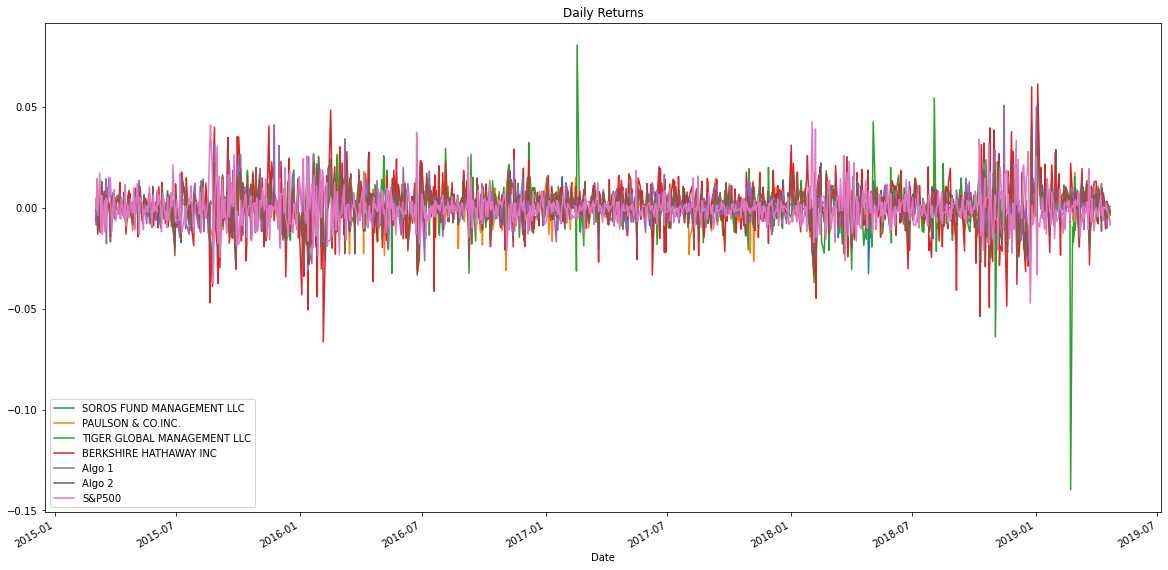

In [56]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title= "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

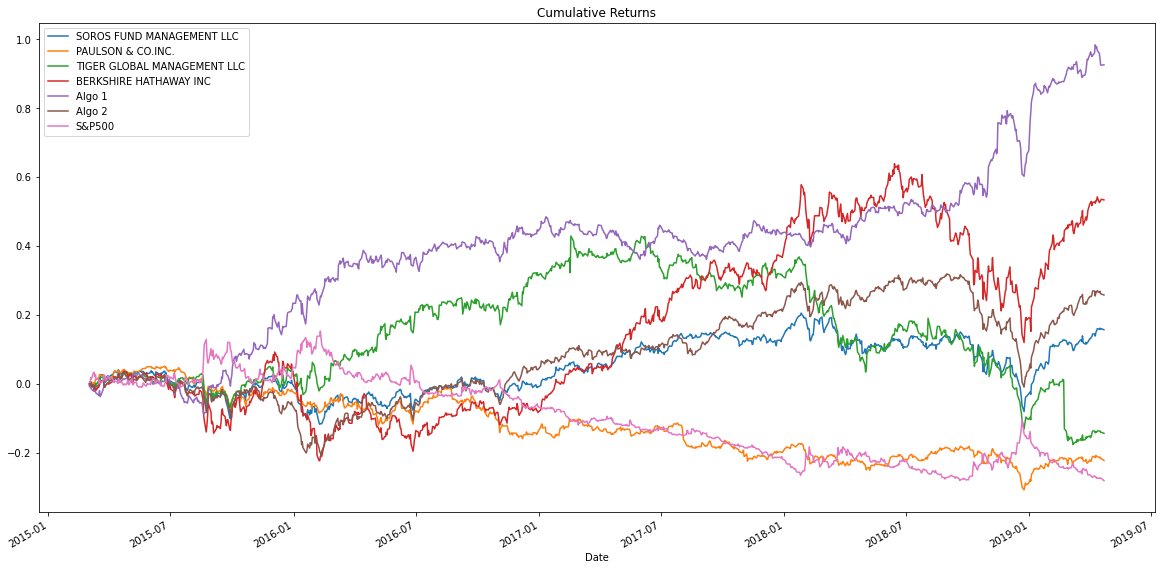

In [57]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10),title= "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

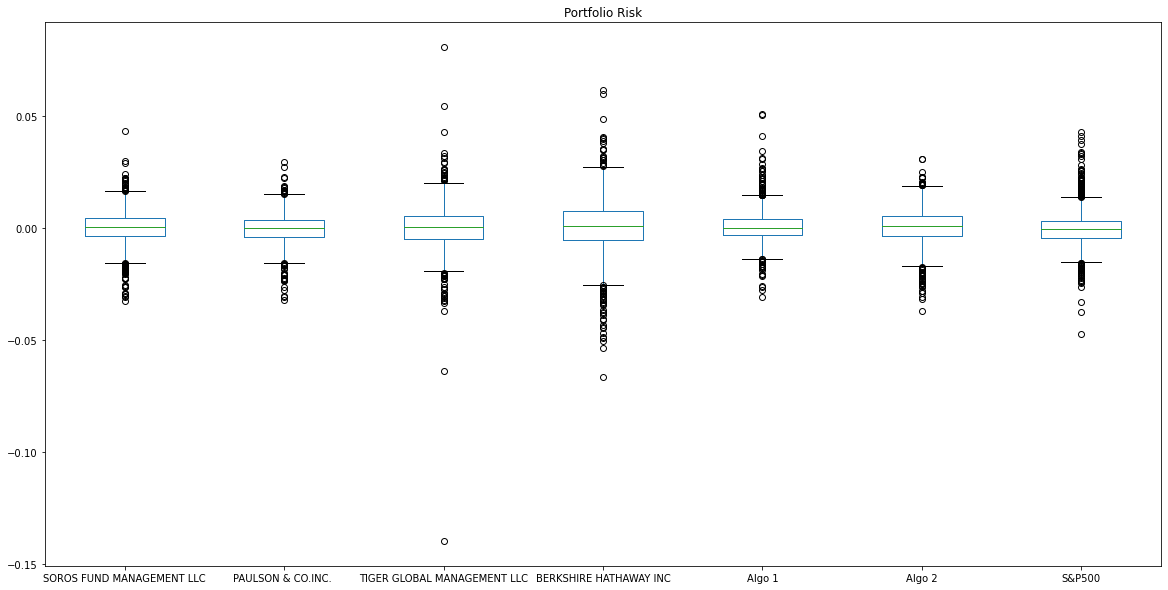

In [58]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [60]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [61]:
# Calculate  the daily standard deviation of S&P 500
daily_std = combined_df.std()
# Determine which portfolios are riskier than the S&P 500
riskier_portfolio = combined_df["S&P500"].std()
combined_df.std() > riskier_portfolio

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

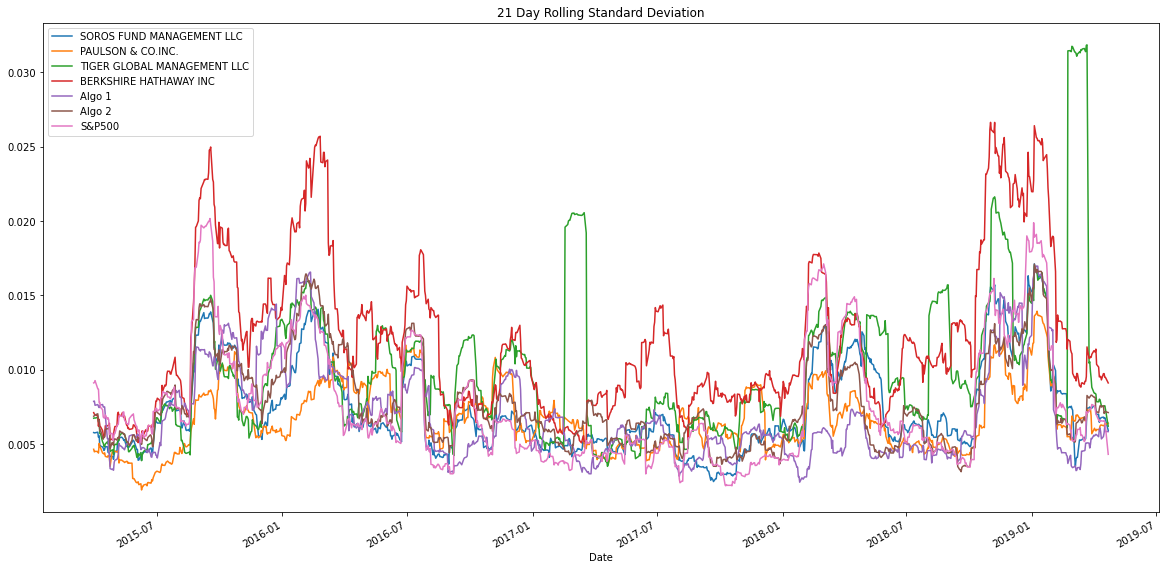

In [63]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [64]:
# Calculate the correlation
corr_table = combined_df.corr()
corr_table
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 Beta'}, xlabel='Date'>

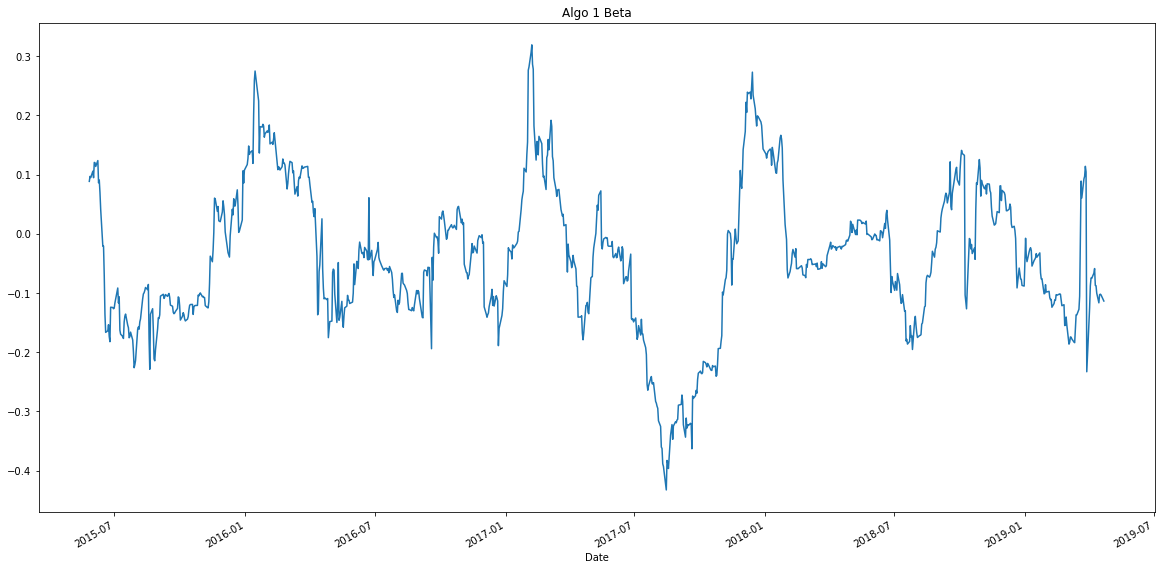

In [68]:
# Calculate covariance of a single portfolio
Algo1 = combined_df['Algo 1'].rolling(window=60).cov(combined_df["S&P500"])
sp_port = combined_df['S&P500'].rolling(window=60).var()
beta = Algo1 / sp_port
beta.plot(figsize=(20,10), title='Algo 1 Beta')
# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

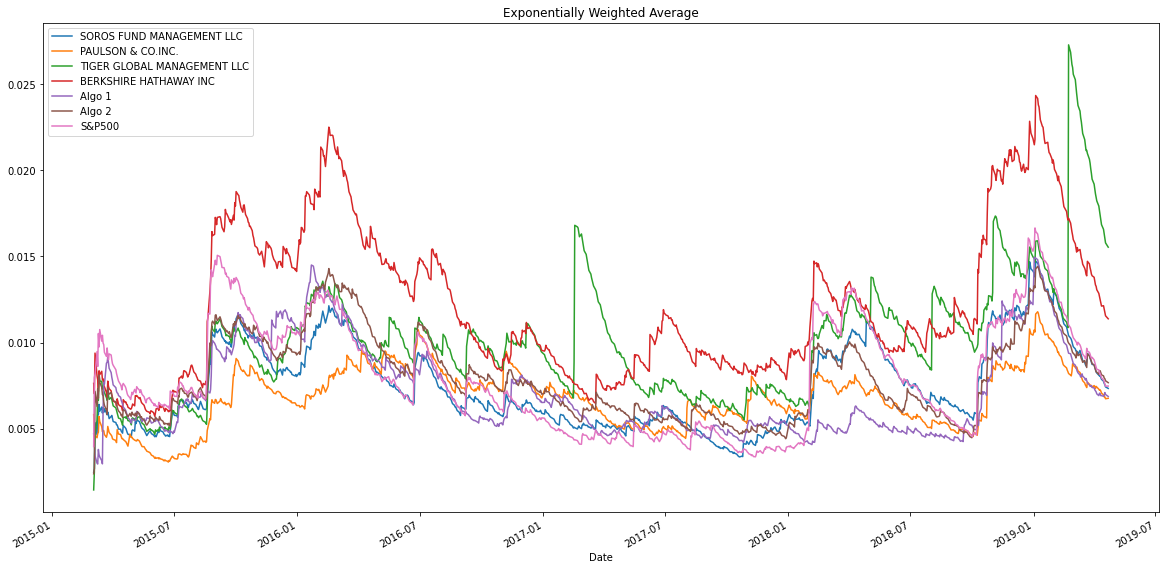

In [69]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

<AxesSubplot:>

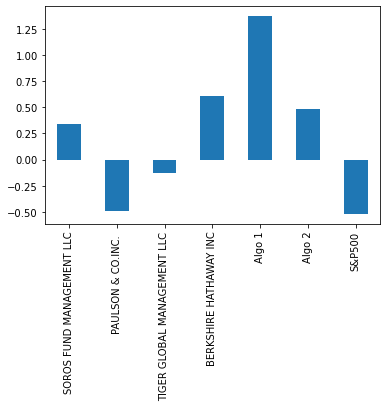

In [71]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
# Yes Algo 1 outperforms both market and the whales

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [73]:

import numpy as np
import datetime as dt
from pathlib import Path
#import hvplot.pandas
%matplotlib inline

In [79]:
# Reading data from 1st stock
goog_historical = Path("../Starter_Code/Resources/goog_historical.csv")
google = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

google["Symbol"] = "Google"
google.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,Google,1162.38
2019-05-08,Google,1166.27
2019-05-07,Google,1174.10
2019-05-06,Google,1189.39
2019-05-03,Google,1185.40


In [80]:
# Reading data from 2nd stock
aapl_historical = Path("../Starter_Code/Resources/aapl_historical.csv")
apple = pd.read_csv(aapl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

apple["Symbol"] = "Apple"
apple.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,Apple,200.72
2019-05-08,Apple,202.90
2019-05-07,Apple,202.86
2019-05-06,Apple,208.48
2019-05-03,Apple,211.75


In [81]:
# Reading data from 3rd stock
cost_historical = Path("../Starter_Code/Resources/cost_historical.csv")
cost = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)

cost["Symbol"] = "Costco"
cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,Costco,243.47
2019-05-08,Costco,241.34
2019-05-07,Costco,240.18
2019-05-06,Costco,244.23
2019-05-03,Costco,244.62


In [83]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([google,apple,cost], axis='rows', join='inner')
custom_df = custom_df.reset_index()
custom_df = custom_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
custom_df.head()

Symbol,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [84]:
# Reset Date index
custom_df.reset_index()
custom_df.head()

Symbol,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [87]:
# Reorganize portfolio data by having a column per symbol
custom_df = custom_df.pivot_table(index='Trade DATE')
custom_df.head()

Symbol,Apple,Costco,Google
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [90]:
# Calculate daily returns
custom_df = custom_df.pct_change()
custom_df.head()
# Drop NAs
custom_df.dropna(inplace=True)
custom_df.head()
# Display sample data


Symbol,Apple,Costco,Google
Trade DATE,,,
2018-05-16,-1.700021,1.099033,-0.904711
2018-05-17,-0.172330,-0.919822,1.001843
2018-05-18,-0.746698,1.353968,-2.270438
2018-05-21,5.938149,0.185718,-1.732643
2018-05-22,-0.540897,-0.026037,-0.170725


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [91]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns= custom_df.dot(weights) 
custom_portfolio_returns.head()
# Display sample data


Trade DATE
2018-05-16   -0.501900
2018-05-17   -0.030103
2018-05-18   -0.554389
2018-05-21    1.463741
2018-05-22   -0.245886
dtype: float64

In [92]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [93]:
custom_df.head()

Symbol,Apple,Costco,Google
Trade DATE,,,
2018-05-16,-1.700021,1.099033,-0.904711
2018-05-17,-0.172330,-0.919822,1.001843
2018-05-18,-0.746698,1.353968,-2.270438
2018-05-21,5.938149,0.185718,-1.732643
2018-05-22,-0.540897,-0.026037,-0.170725


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# Join your returns DataFrame to the original returns DataFrame
combined_df_new = pd.concat([combined_df, custom_df], ignore_index=True, sort=False)

combined_df_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Apple,Costco,Google
0,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN
1,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
3,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
4,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN


In [95]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df_new.dropna(inplace=False)
combined_df_new.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Apple,Costco,Google
0,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN
1,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
3,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
4,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [96]:
# Calculate the annualized `std`
annual_std = combined_df_new.std() * np.sqrt(252)
annual_std.sort_values(ascending = False)

Google                         757.077291
Apple                          722.133423
Costco                         368.986220
BERKSHIRE HATHAWAY INC           0.205079
TIGER GLOBAL MANAGEMENT LLC      0.172989
S&P500                           0.136313
Algo 2                           0.132413
SOROS FUND MANAGEMENT LLC        0.125348
Algo 1                           0.121006
PAULSON & CO.INC.                0.111527
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

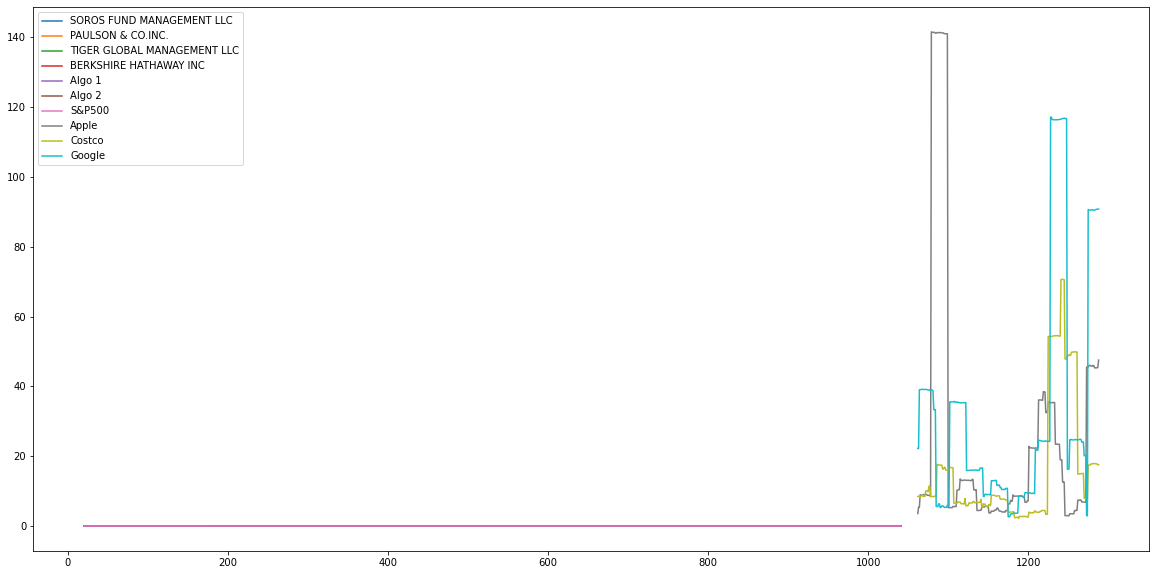

In [105]:
# Calculate rolling standard deviation
rolling_std = combined_df_new.std()* np.sqrt(252)
# Plot rolling standard deviation
combined_df_new.rolling(window=21).std().plot(figsize = (20, 10))

### Calculate and plot the correlation

In [107]:
# Calculate and plot the correlation
corr_table = combined_df_new.corr()
corr_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Apple,Costco,Google
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,NaN,NaN,NaN
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,NaN,NaN,NaN
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,NaN,NaN,NaN
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,NaN,NaN,NaN
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,NaN,NaN,NaN
Apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.055424,-0.027079
Costco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055424,1.000000,0.097923
Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.027079,0.097923,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}>

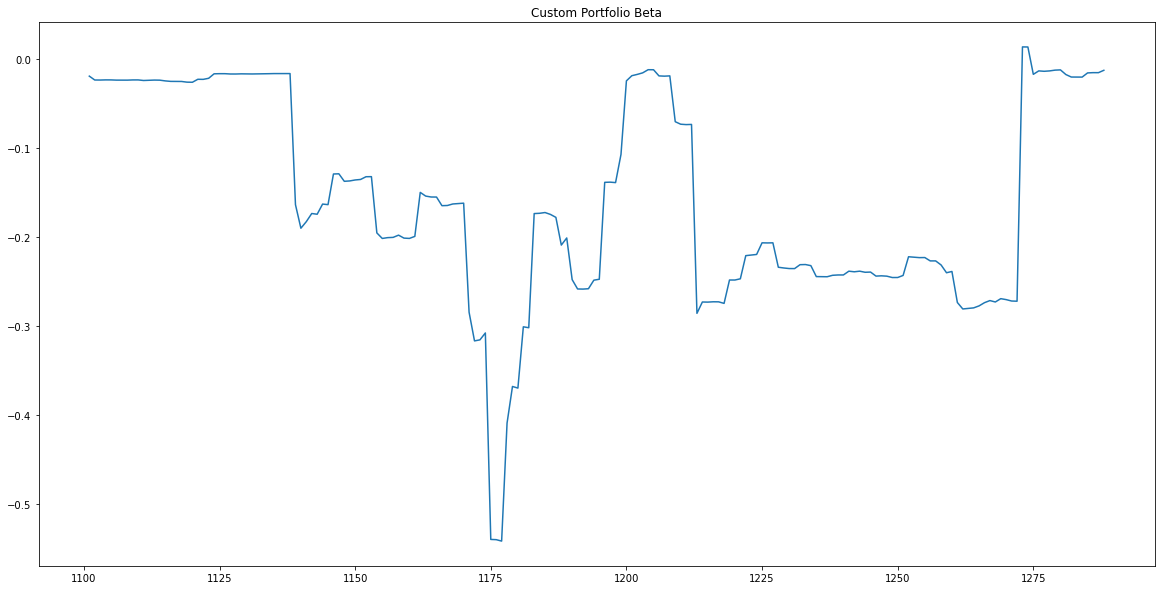

In [108]:
# Calculate and plot Beta
covariance_all = combined_df_new["Google"].rolling(window=60).cov(combined_df_new["Apple"])
variance_intuit = combined_df_new['Apple'].rolling(window=60).var()
all_portfolio_beta = covariance_all / variance_intuit
all_portfolio_beta.plot(figsize=(20,10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [109]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio2 = (combined_df_new.mean() * 252) / (combined_df_new.std() * np.sqrt(252))
sharpe_ratio2

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
Apple                         -1.728956
Costco                        -1.768186
Google                         0.140570
dtype: float64

<AxesSubplot:>

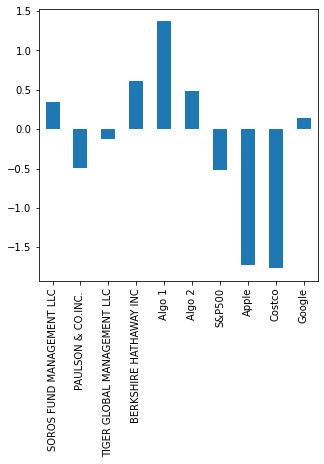

In [110]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio2.plot.bar(figsize=(5,5))

### How does your portfolio do?

Write your answer here!

In [ ]:
#The portfolio fared well with a balance of stock